In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [41]:
df = pd.read_csv("losses.csv")

loss_mean = pd.read_csv("losses_mean.csv")

#df = loss.append(loss_mean)

In [40]:
df.groupby(["Replacement", "Voting", "Submodels"]).loss.mean()

#df["Replacement"][1]

Replacement  Voting  Submodels
FALSE        mean    4            0.600686
             median  4            0.607968
                     16           0.613241
                     32           0.598712
TRUE         median  4            0.591862
                     16           0.616546
                     32           0.601147
none         none    1            0.596589
Name: loss, dtype: float64

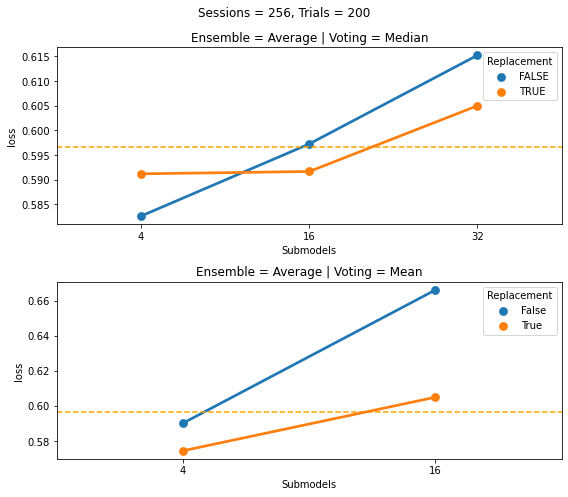

In [43]:
df1 = df.query('Sessions == 256 and Trials == 200 and Voting == "median" and Ensemble == "average" ')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,7)) #, sharex=True

baseline_acc = df.query('model == "Baseline"').loss.mean()        
ax[0].axhline(baseline_acc, ls='--', color="orange")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        ax=ax[0]
        )
ax[0].set_title("Ensemble = Average | Voting = Median")


ax[1].axhline(baseline_acc, ls='--', color="orange")

df2 = loss_mean.query('Sessions == 256 and Trials == 200 and Voting == "mean" and Ensemble == "average" ')
sns.pointplot(
        data=df2, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        ax=ax[1]
        )
ax[1].set_title("Ensemble = Average | Voting = Mean")

plt.suptitle("Sessions = 256, Trials = 200")

plt.tight_layout()
plt.show()

# facet by vote and average

ValueError: Invalid RGBA argument: 0.12156862745098039

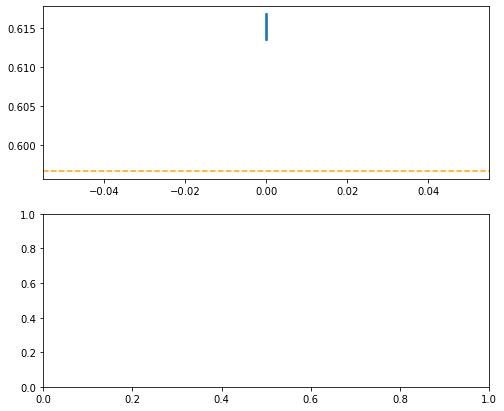

In [44]:
df1 = df.query('Sessions == 32 and Trials == 50 and Voting == "median" and Ensemble == "average" ')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,7))

     
ax[0].axhline(baseline_acc, ls='--', color="orange")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax=ax[0]
        )

ax[0].set_title("Ensemble = Average | Voting = Median")


ax[1].axhline(baseline_acc, ls='--', color="orange")

df2 = loss_mean.query('Sessions == 32 and Trials == 50 and Voting == "mean" and Ensemble == "average" ')
sns.pointplot(
        data=df2, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax=ax[1]
        )
        
ax[1].set_title("Ensemble = Average | Voting = Mean")

plt.suptitle("Sessions == 32, Trials == 50")

plt.tight_layout()
plt.show()

# facet by vote and average

In [39]:
df1 = df.query('Sessions == 32 and Trials == 50 and Voting == "median" and Ensemble == "average" ')

df1.groupby(["Submodels", "Replacement"]).loss.mean()


Submodels  Replacement
4          FALSE          0.615014
16         TRUE           0.655046
32         TRUE           0.593376
Name: loss, dtype: float64